In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# transcript_df
**person:** customer id<br>
**event:** offer received, offer viewed, offer completed, transaction<br>
**value:** offer id or transaction amount<br>
**time:** timeline of dataframe in hours<br>

In [107]:
transcript_df = pd.read_csv('transcript.csv')

In [108]:
transcript_df.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [109]:
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [110]:
transcript_df.describe()

,Unnamed: 0,time
count,306534.000000,306534.000000
mean,153266.500000,366.382940
std,88488.888045,200.326314
min,0.000000,0.000000
25%,76633.250000,186.000000
50%,153266.500000,408.000000
75%,229899.750000,528.000000
max,306533.000000,714.000000


# Full disclosure
The value columns in the portfolio_df originally looked like this: {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'} or like this {'amount': 34.56} when the 'event' value was transaction. We couldn't figure out a way to programmatically clean that up. So we went into the csv and did some find-replaces to deleted the unneeded characters.

# profile_df
**gender**<br>
**age**<br>
**id:** customer id<br>
**became_member_on:** date customer joined app<br>
**income**

In [111]:
profile_df = pd.read_csv('profile.csv')

In [112]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [113]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [114]:
profile_df.describe()

,Unnamed: 0,age,became_member_on,income
count,17000.000000,17000.000000,1.700000e+04,14825.000000
mean,8499.500000,62.531412,2.016703e+07,65404.991568
std,4907.621624,26.738580,1.167750e+04,21598.299410
min,0.000000,18.000000,2.013073e+07,30000.000000
25%,4249.750000,45.000000,2.016053e+07,49000.000000
50%,8499.500000,58.000000,2.017080e+07,64000.000000
75%,12749.250000,73.000000,2.017123e+07,80000.000000
max,16999.000000,118.000000,2.018073e+07,120000.000000


# 17,000 customers
We see here that the length of profile_df is the same as the number of unique 'person' values in transcript_df. So it's apparent we have data on 17,000 Starbucks customers.

In [115]:
len(profile_df)

17000

In [116]:
transcript_df['person'].nunique()

17000

And it looks like more than 2,000 of them are 118 years old

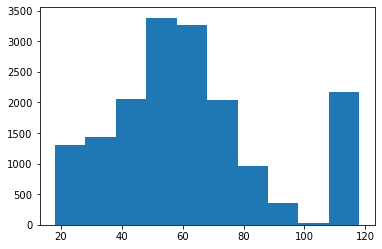

In [117]:
plt.hist(profile_df['age']);

In [118]:
df_118 = profile_df[profile_df['age'] == 118]

In [119]:
df_118.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN


In [120]:
df_118.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 16994
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2175 non-null   int64  
 1   gender            0 non-null      object 
 2   age               2175 non-null   int64  
 3   id                2175 non-null   object 
 4   became_member_on  2175 non-null   int64  
 5   income            0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 118.9+ KB


# Hidden missing value
It turns out that all of our 118-year-old customers are missing gender and income values. So it looks like 118 is just a default value for missing ages. We'll filter the 118-year-olds out of this dataframe.

In [121]:
profile_df = profile_df[profile_df['age'] != 118]

In [122]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [123]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14825 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               14825 non-null  int64  
 3   id                14825 non-null  object 
 4   became_member_on  14825 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 810.7+ KB


We'll change became_member_on column to datetime.

In [124]:
import datetime

In [125]:
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'], format='%Y%m%d')

In [126]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [127]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        14825 non-null  int64         
 1   gender            14825 non-null  object        
 2   age               14825 non-null  int64         
 3   id                14825 non-null  object        
 4   became_member_on  14825 non-null  datetime64[ns]
 5   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 810.7+ KB


# portfolio_df
**reward:** reward for using offer<br>
**channels:** web, email, mobile, social<br>
**difficulty:** miminum spend to complete offer<br>
**offer_type:** buy-one-get-one, informational, discount<br>

In [128]:
portfolio_df = pd.read_csv('portfolio.csv')

In [129]:
portfolio_df.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [130]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [131]:
portfolio_df.describe()

,Unnamed: 0,reward,difficulty,duration
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,4.200000,7.700000,6.500000
std,3.02765,3.583915,5.831905,2.321398
min,0.00000,0.000000,0.000000,3.000000
25%,2.25000,2.000000,5.000000,5.000000
50%,4.50000,4.000000,8.500000,7.000000
75%,6.75000,5.000000,10.000000,7.000000
max,9.00000,10.000000,20.000000,10.000000


# 10 offers
We see here that the length of the portfolio_df is 10, which is equal to the number of unique values in the values column of transcript_df when we filter out transactions. In other words, the value column of the offers_only dataframe below indicates the id of offer received, offer viewed or offer completed.

In [132]:
len(portfolio_df)

10

In [134]:
offers_only = transcript_df[transcript_df['event'] != 'transaction']

In [136]:
offers_only.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [135]:
offers_only['value'].nunique()

10

# A list disguised as a string
The porfolio_df 'channels' column looks like a list of the different channels, but it's actually a string that we need to clean up.

In [137]:
channels_as_list = list(portfolio_df['channels'])

Now we have a list of strings

In [138]:
channels_as_list

["['email', 'mobile', 'social']",
 "['web', 'email', 'mobile', 'social']",
 "['web', 'email', 'mobile']",
 "['web', 'email', 'mobile']",
 "['web', 'email']",
 "['web', 'email', 'mobile', 'social']",
 "['web', 'email', 'mobile', 'social']",
 "['email', 'mobile', 'social']",
 "['web', 'email', 'mobile', 'social']",
 "['web', 'email', 'mobile']"]

And we'll make it a list of lists

In [139]:
for i in range(0, len(channels_as_list)):
    channels_as_list[i] = channels_as_list[i].replace("'", "").strip("[]").split(", ")

In [140]:
channels_as_list

[['email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile'],
 ['web', 'email', 'mobile'],
 ['web', 'email'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile']]

# Category encoding the hard way?
We'll create a dataframe of zeros and fill it with 1s based on whether the column label is in the list corresponding to that row.

In [141]:
channels_df = pd.DataFrame(np.zeros((10, 4)), columns = ['web', 'email', 'mobile', 'social'])

In [142]:
channels_df

,web,email,mobile,social
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [143]:
channels_df.columns

Index(['web', 'email', 'mobile', 'social'], dtype='object')

In [144]:
for i in range(0, 10):
    for j in range(0, 4):
        if channels_df.columns[j] in channels_as_list[i]:
            channels_df.iloc[i, j] = 1

In [145]:
channels_df

,web,email,mobile,social
0,0.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,0.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,0.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,0.0


In [146]:
channels_df = channels_df.astype(int)

In [147]:
channels_df

,web,email,mobile,social
0,0,1,1,1
1,1,1,1,1
2,1,1,1,0
3,1,1,1,0
4,1,1,0,0
5,1,1,1,1
6,1,1,1,1
7,0,1,1,1
8,1,1,1,1
9,1,1,1,0


Now we'll drop the channels column and concatenate the itemized channels columns to portfolio_df.

In [148]:
portfolio_df = portfolio_df.drop(columns = ['channels'])

In [149]:
portfolio_df

,Unnamed: 0,reward,difficulty,duration,offer_type,id
0,0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [150]:
portfolio_df = pd.concat([portfolio_df, channels_df], axis = 1)

In [151]:
portfolio_df

,Unnamed: 0,reward,difficulty,duration,offer_type,id,web,email,mobile,social
0,0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0
5,5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


All three dataframes have a column that just repeats the index. We'll drop those now.

In [152]:
list_of_dfs = [transcript_df, profile_df, portfolio_df]

In [153]:
for df in list_of_dfs:
    df.drop(columns = ['Unnamed: 0'], inplace = True)

In [154]:
transcript_df.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [155]:
profile_df.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [156]:
portfolio_df.head()

,reward,difficulty,duration,offer_type,id,web,email,mobile,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0


# A closer look at transcript_df
If we sort transcript_df by person and time, we have a timeline for each customer.

In [157]:
transcript_df.sort_values(by = ['person', 'time']).head(25)

,person,event,value,time
55972,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168
77705,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,192
89291,0009655768c64bdeb2e877511632db8f,transaction,22.16,228
113605,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336
139992,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372
153401,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,408
168412,0009655768c64bdeb2e877511632db8f,transaction,8.57,414
168413,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,414
187554,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,456
204340,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,504


# New dataframe
So let's create a new dataframe with a fresh index. 

In [215]:
starbucks_cust = transcript_df.sort_values(by = ['person', 'time'], ignore_index = True)

In [216]:
starbucks_cust.head()

,person,event,value,time
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,192
2,0009655768c64bdeb2e877511632db8f,transaction,22.16,228
3,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336
4,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372


# Adding transaction column
If there's a transaction amount in the value column, we'll indicate it in the transaction column.

In [217]:
starbucks_cust['transaction'] = np.where(starbucks_cust['event'] == 'transaction', starbucks_cust['value'], np.nan)

In [218]:
starbucks_cust.head()

,person,event,value,time,transaction
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168,NaN
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,192,NaN
2,0009655768c64bdeb2e877511632db8f,transaction,22.16,228,22.16
3,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336,NaN
4,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372,NaN


In [219]:
starbucks_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   person       306534 non-null  object
 1   event        306534 non-null  object
 2   value        306534 non-null  object
 3   time         306534 non-null  int64 
 4   transaction  138953 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.7+ MB


In [220]:
starbucks_cust = starbucks_cust.reindex(columns=['person', 'event', 'value', 'transaction', 'time'])

In [221]:
starbucks_cust.head(10)

,person,event,value,transaction,time
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,NaN,168
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,NaN,192
2,0009655768c64bdeb2e877511632db8f,transaction,22.16,22.16,228
3,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,NaN,336
4,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,NaN,372
5,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,NaN,408
6,0009655768c64bdeb2e877511632db8f,transaction,8.57,8.57,414
7,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,414
8,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,456
9,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,NaN,504


In [195]:
#starbucks_cust['offer_completed'] = np.where(starbucks_cust['event'] == 'offer completed', 1, 0)

In [196]:
# for i in range(1, len(starbucks_cust)):
#     if (starbucks_cust.iloc[i, 1] == 'offer completed') and (starbucks_cust.iloc[i-1, 1] != 'transaction') and\
#                                                              (starbucks_cust.iloc[i-1, 1] != 'offer completed'):
#         print(f"Offer completed at index {i} does not have transaction or offer completed before it.")
#         break
# print(i)
# print("For loop completed")

306533
For loop completed


# time_diff column
It looks like every time a purchase is made to complete an offer, the row indicating the transaction is followed by the row indicating offer completed, and the time value is the same in both columns. So we'll add a time_diff column and use it to create another column that identifies purchases that are made to complete offers.

In [222]:
starbucks_cust['time_diff'] = starbucks_cust['time'].diff(-1)

In [223]:
starbucks_cust.head(20)

,person,event,value,transaction,time,time_diff
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,NaN,168,-24.0
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,NaN,192,-36.0
2,0009655768c64bdeb2e877511632db8f,transaction,22.16,22.16,228,-108.0
3,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,NaN,336,-36.0
4,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,NaN,372,-36.0
5,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,NaN,408,-6.0
6,0009655768c64bdeb2e877511632db8f,transaction,8.57,8.57,414,0.0
7,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,414,-42.0
8,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,456,-48.0
9,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,NaN,504,-24.0


In [224]:
starbucks_cust['offer_purch'] = np.where((starbucks_cust['event'] == 'transaction') & (starbucks_cust['time_diff'] == 0),\
                                         1, 0)
                                                                            

In [225]:
starbucks_cust.head(20)

,person,event,value,transaction,time,time_diff,offer_purch
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,NaN,168,-24.0,0
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,NaN,192,-36.0,0
2,0009655768c64bdeb2e877511632db8f,transaction,22.16,22.16,228,-108.0,0
3,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,NaN,336,-36.0,0
4,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,NaN,372,-36.0,0
5,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,NaN,408,-6.0,0
6,0009655768c64bdeb2e877511632db8f,transaction,8.57,8.57,414,0.0,1
7,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,414,-42.0,0
8,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,456,-48.0,0
9,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,NaN,504,-24.0,0


Probably don't need that time_diff column anymore

In [226]:
starbucks_cust = starbucks_cust.drop(columns = ['time_diff'])

In [227]:
starbucks_cust.head()

,person,event,value,transaction,time,offer_purch
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,NaN,168,0
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,NaN,192,0
2,0009655768c64bdeb2e877511632db8f,transaction,22.16,22.16,228,0
3,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,NaN,336,0
4,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,NaN,372,0


In [229]:
profile_df.rename(columns = {'id':'person'}, inplace = True)

# Joining dataframes
We'll start by joining starbucks_cust with profile_df. First we need to change name of the id column in profile_df to 'person.'

In [230]:
profile_df.head()

,gender,age,person,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [231]:
starbucks_df = pd.merge(starbucks_cust, profile_df, how = 'left', on = 'person')

In [232]:
starbucks_df.head()

,person,event,value,transaction,time,offer_purch,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,NaN,168,0,M,33.0,2017-04-21,72000.0
1,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,NaN,192,0,M,33.0,2017-04-21,72000.0
2,0009655768c64bdeb2e877511632db8f,transaction,22.16,22.16,228,0,M,33.0,2017-04-21,72000.0
3,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,NaN,336,0,M,33.0,2017-04-21,72000.0
4,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,NaN,372,0,M,33.0,2017-04-21,72000.0


We have some missing values here, but that's probably because we dropped those 2175 rows from profile. Those customer ids need to be filtered out of our merged df.

In [233]:
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person            306534 non-null  object        
 1   event             306534 non-null  object        
 2   value             306534 non-null  object        
 3   transaction       138953 non-null  object        
 4   time              306534 non-null  int64         
 5   offer_purch       306534 non-null  int32         
 6   gender            272762 non-null  object        
 7   age               272762 non-null  float64       
 8   became_member_on  272762 non-null  datetime64[ns]
 9   income            272762 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 24.6+ MB


In [234]:
starbucks_cust['person'].nunique()

17000

In [235]:
#Drop rows with missing values in gender, age, became-member-on and income